In [2]:
#Hello. This notebook was my proof of concept for image processing. 
#If you are looking for my final product, this is not the place.

In [3]:
#importing required libaries
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
import imghdr

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
# Defining the dataset using Tensorflow's very helpful data module
# the dataset is linked to the data dictionary
tf.data.Dataset
import numpy as np
from matplotlib import pyplot as plt
data = tf.keras.utils.image_dataset_from_directory("Dataset")

Found 3784 files belonging to 2 classes.


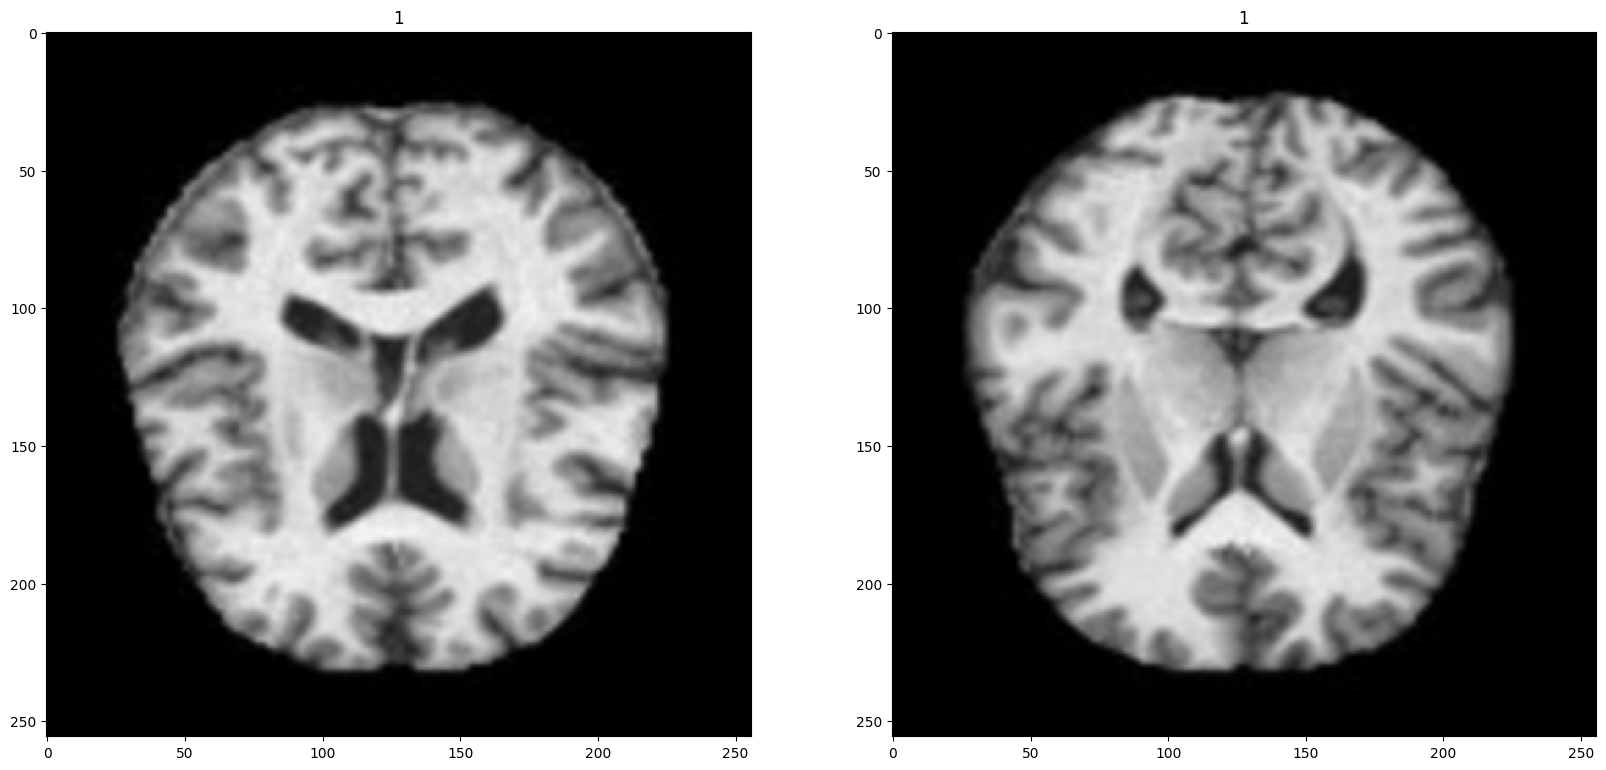

In [6]:
data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()
#Displaying some of the images
fig, ax = plt.subplots(ncols=2, figsize=(20, 20))
for idx, img in enumerate(batch[0][:2]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])#the class of the image is displayed at the top

In [7]:
# the computer doesn't understand 'demented' and 'non-demented'
# the Dataset function classifies the data as class 0 and 1

# 0 = Demented
# 1 = Non Demented

In [8]:
#preprocessing

In [9]:
batch[0].max() # this is the value of the brightest pixel in the images

251.8125

In [10]:
# neural networks don't do too well if the numbers its handeling are too large. 
#This is putting the value of the brightest pixel at 1 and the darkest pixle at 0
data = data.map(lambda x,y:(x/255, y)) 

In [11]:
scaled_iterator = data.as_numpy_iterator()

In [12]:
batch = scaled_iterator.next()#automaticly flipping through a batch of data

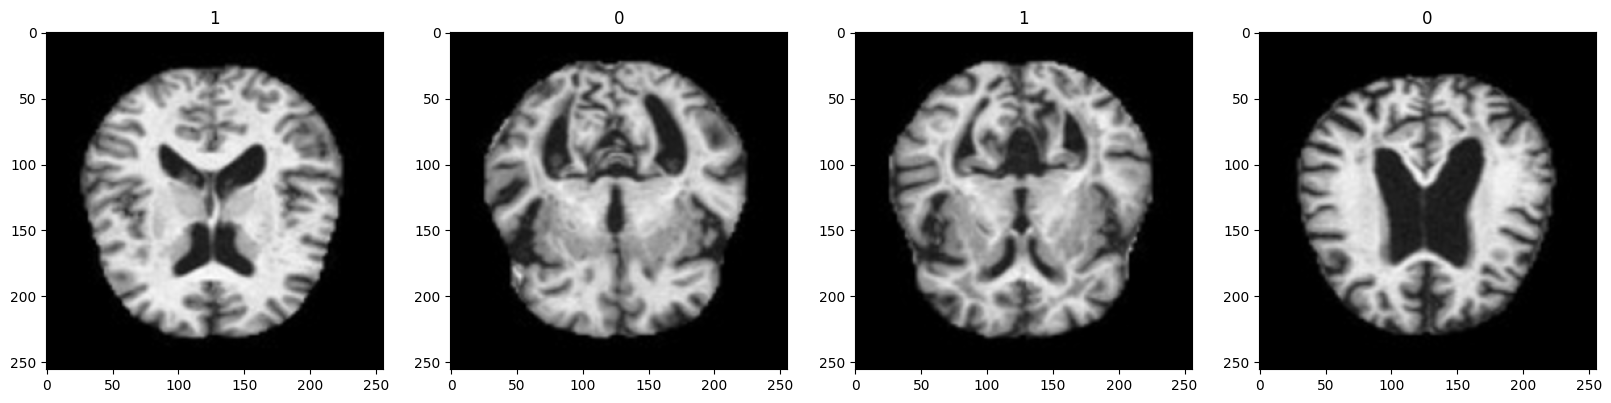

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [14]:
batch[0].max()

0.99313724

In [15]:
len(data)#the data allows for 400 batches of 32 images

119

In [16]:
#data = data.shuffle()

In [17]:
#it is standared for the data to be divided 80/20. 80% training and 20% testing
train_size = int(len(data) *.7)
val_size = int(len(data) *.2)
test_size = int(len(data) *.1)#this will be saved for evaulation

In [18]:
train_size # keep in mind these numbers are the number of batches, not images

83

In [19]:
val_size

23

In [20]:
test_size

11

In [21]:
train_size+val_size+test_size

117

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [23]:
data = data.shuffle(buffer_size=12790)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [5]:
model = Sequential()#the Sequential model takes one input and gives one output

NameError: name 'Sequential' is not defined

In [3]:
model.add(Conv2D(16, (3,3),1, activation= 'relu', input_shape=(256,256,3)))#the convolution layer
model.add(MaxPooling2D())#max pooling

model.add(Conv2D(32, (3,3),1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3),1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [29]:
# training

In [30]:
log = 'logs'

In [31]:
# model training
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 4, 
                                        restore_best_weights = True)
# that will stop training if the val_loss is too high to avoid overfitting
callback = tf.keras.callbacks.TensorBoard(log_dir=log)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[callback, earlystopping])

Epoch 1/20
83/83 [==============================] - 40s 469ms/step - loss: 0.5310 - accuracy: 0.7270 - val_loss: 0.4573 - val_accuracy: 0.7677
Epoch 2/20
83/83 [==============================] - 39s 462ms/step - loss: 0.3949 - accuracy: 0.8069 - val_loss: 0.3673 - val_accuracy: 0.8315
Epoch 3/20
83/83 [==============================] - 38s 456ms/step - loss: 0.2692 - accuracy: 0.8848 - val_loss: 0.2808 - val_accuracy: 0.8682
Epoch 4/20
83/83 [==============================] - 39s 466ms/step - loss: 0.1842 - accuracy: 0.9277 - val_loss: 0.2731 - val_accuracy: 0.8940
Epoch 5/20
83/83 [==============================] - 39s 466ms/step - loss: 0.1293 - accuracy: 0.9499 - val_loss: 0.2311 - val_accuracy: 0.9171
Epoch 6/20
83/83 [==============================] - 39s 464ms/step - loss: 0.1063 - accuracy: 0.9575 - val_loss: 0.2026 - val_accuracy: 0.9171
Epoch 7/20
83/83 [==============================] - 39s 465ms/step - loss: 0.0592 - accuracy: 0.9808 - val_loss: 0.3188 - val_accuracy: 0.9049

In [32]:
# loss is num * 10^-5

In [33]:
hist.history

{'loss': [0.5310369729995728,
  0.3949388563632965,
  0.2692272365093231,
  0.18416494131088257,
  0.12931621074676514,
  0.10632987320423126,
  0.059168022125959396,
  0.041057419031858444,
  0.023807240650057793,
  0.040127966552972794,
  0.024781370535492897,
  0.01550931204110384,
  0.0101849976927042,
  0.002147136954590678,
  0.0031405468471348286],
 'accuracy': [0.7270331382751465,
  0.806852400302887,
  0.8847891688346863,
  0.9277108311653137,
  0.9499247074127197,
  0.9574548006057739,
  0.9807981848716736,
  0.9883283376693726,
  0.990963876247406,
  0.9849397540092468,
  0.9928463697433472,
  0.994352400302887,
  0.9969879388809204,
  1.0,
  0.9996234774589539],
 'val_loss': [0.4573385417461395,
  0.3673205077648163,
  0.28082171082496643,
  0.27308303117752075,
  0.2310575246810913,
  0.2026354968547821,
  0.31879857182502747,
  0.16981126368045807,
  0.20513693988323212,
  0.2027493566274643,
  0.13859538733959198,
  0.20383642613887787,
  0.17432156205177307,
  0.2073899

In [34]:
#model_cm = 

In [35]:
import sklearn
disp = sklearn.metrics.ConfusionMatrixDisplay(cm, display_labels = None)
disp.plot()
plt.show()

AttributeError: module 'sklearn' has no attribute 'metrics'

In [36]:
import plotly.express as px

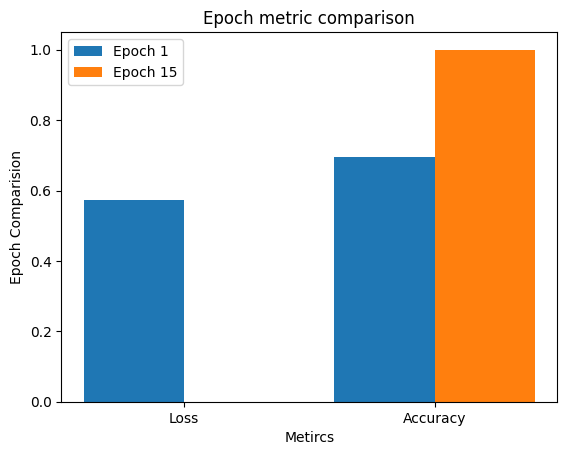

In [37]:

import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Loss','Accuracy']
epoche1 = [0.5723,0.6964]
epoche2 = [ 2.4639113689772785e-05,1]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, epoche1, 0.4, label = 'Epoch 1')
plt.bar(X_axis + 0.2, epoche2, 0.4, label = 'Epoch 15')
  
plt.xticks(X_axis, X)
plt.xlabel("Metircs")
plt.ylabel("Epoch Comparision")
plt.title('Epoch metric comparison')
plt.legend()
plt.show()

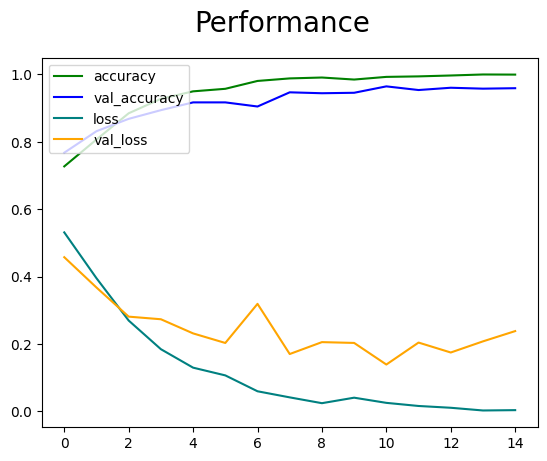

In [38]:
# model Performance plotted on a graph
fig = plt.figure()
plt.plot(hist.history['accuracy'], color="green", label='accuracy')
plt.plot(hist.history['val_accuracy'], color="blue", label="val_accuracy")
plt.plot(hist.history['loss'], color="teal", label='loss')
plt.plot(hist.history['val_loss'], color="orange", label="val_loss")
fig.suptitle('Performance', fontsize=20)
plt.legend(loc= 'upper left')
plt.show()

In [ ]:
#Evaluation/testing
# this is the fun part :))) 

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
acc = BinaryAccuracy()

In [ ]:
# using the testing data to get a final eval of the model
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    acc.update_state(y, yhat)

In [ ]:
print(f'Accuracy:{acc.result().numpy()}')

In [ ]:
y_pred = np.where(yhat > 0.5, 1, 0)
print(y_pred)

In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix

cm = sklearn.metrics.confusion_matrix(y, y_pred, labels=None, sample_weight=None, normalize=None)

In [ ]:
import matplotlib.pyplot
disp = sklearn.metrics.ConfusionMatrixDisplay(cm, display_labels = None)
disp.plot()
plt.show()

In [ ]:
# its always funner (is that a word? funner?) to test the model in person 

In [ ]:
img = cv2.imread('MRI4.jpg')# <--- any image can be put here
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
#plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0)) # prediction

In [ ]:
#the prediction will give a number between 0 and 1 (the two classes). 
#since class 0 is Demented, anything closer to 0 was predicted demented
yhat

In [ ]:
if yhat > 0.5:
    print('Predicted class is Non Demented')
    
else:
    print('Predicted class in Demented')

In [ ]:
# boom.

In [ ]:
# this is the original, Andi